##  Linear Regression - Bike Sharing Assignment

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They
have contracted a consulting company to understand the factors on which the demand for these shared
bikes depends. Specifically, they want to understand the factors affecting the demand for these shared
bikes in the American market. The company wants to know:

● Which variables are significant in predicting the demand for shared bikes.

● How well those variables describe the bike demands


###  Step 1 . Reading and Understanding the data

In [1]:
# Ignore Warnigns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Numpy and Pandas Library

import numpy as np
import pandas as pd

In [3]:
# Read the Bike Sharing dataset
bike = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check shape of dataset
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check the percentage of Null columns if any.
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=True)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# Check the percentage of Null rows if any.
round(100*(bike.isnull().sum(axis=1)/len(bike)), 2).sort_values(ascending=True)

0      0.0
481    0.0
482    0.0
483    0.0
484    0.0
      ... 
246    0.0
247    0.0
248    0.0
250    0.0
729    0.0
Length: 730, dtype: float64

###  Step 2 . Data Preparation and Data Visualisation

In [10]:
# By analysing Bike sharing dataset , noticed that first column 'instant' indicates row number of each records and that
# will not useful for modeling so let's drop the 'instant' column.
bike.drop(['instant'] , axis=1 , inplace=True)

In [11]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# There are three columns which indicates date, month and year data - dteday , mnth and yr respectively.
# we already have 'yr' and 'mnth' columns in numerical format and dteday in object datatype which will not useful for modeling
# then let's drop 'dteday' column.
bike.drop(['dteday'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# In the dataset, there are another three columns namely 'casual', 'registered', and 'cnt', The variable 'casual' indicates the
# number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered 
# users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, 
# including both casual and registered. The model should be built taking this 'cnt' as the target variable.
# So let's drop 'casual' and 'registered' columns as we are not using in modeling. 
bike.drop(['casual','registered'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


####  Visualisation

In [14]:
# importing matplot and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

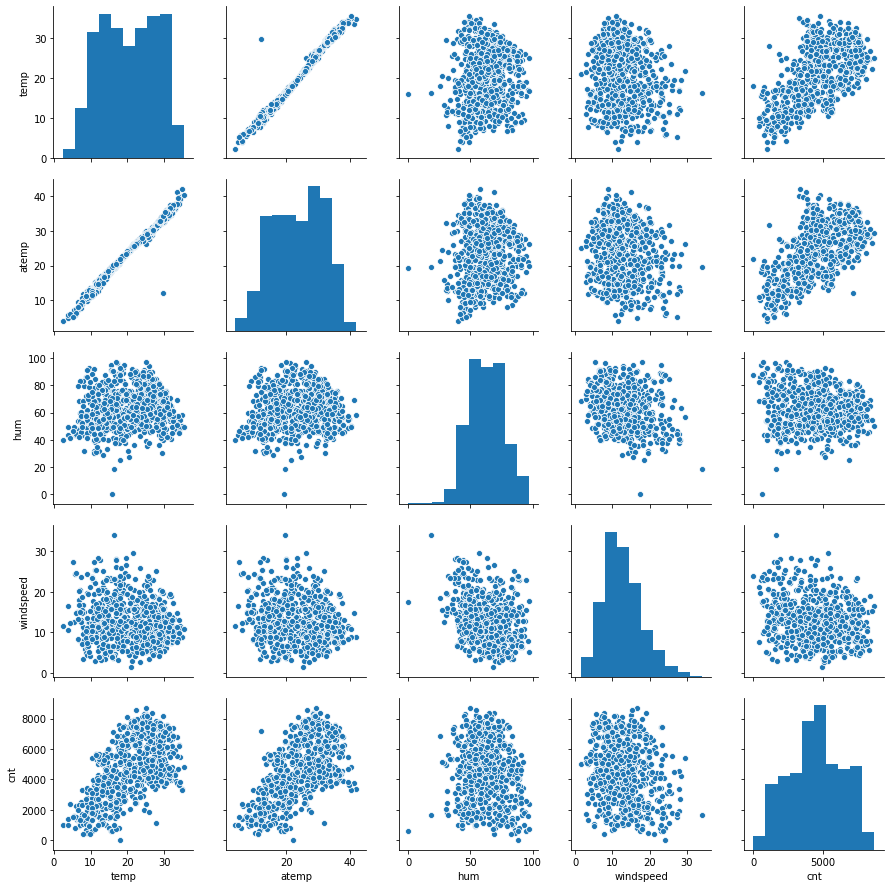

In [15]:
# Visualising Numerical variables along target varibable
bike_numerical_var=bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_numerical_var)
plt.show()

In [16]:
# From the above we can conclude that, there is a linear relationship between 'temp', 'atemp' independent varibales with 
# the dependent varibale 'cnt'.

In [17]:
# Looks like there is multicollinearity between independent variables 'temp' and 'atemp'. 

In [18]:
# Visualising Variables
# As we might have noticed that , there are a few categorical variables and categorical variables in binary as well. 
# Let's make a boxplot for some of these variables.
# 1) Season - We have 4 seasons in Bike dataset and they are spring, summer , fall and winter.
# 2) yr(year) - 0 --> 2018 and 1--> 2019 years data.
# 3) holiday - 0(no holiday) and 1(yes it's holiday).
# 4) weathersit - 1,2,3 in category.
# 5) workingday - category in binary 0-not workingday and 1- workingday.
# 6) weekday - 0-sunday, 1-Monday, 2-Tuesday, 3-Wednesday, 4-Thursday, 5-Friday, 6-Saturday.

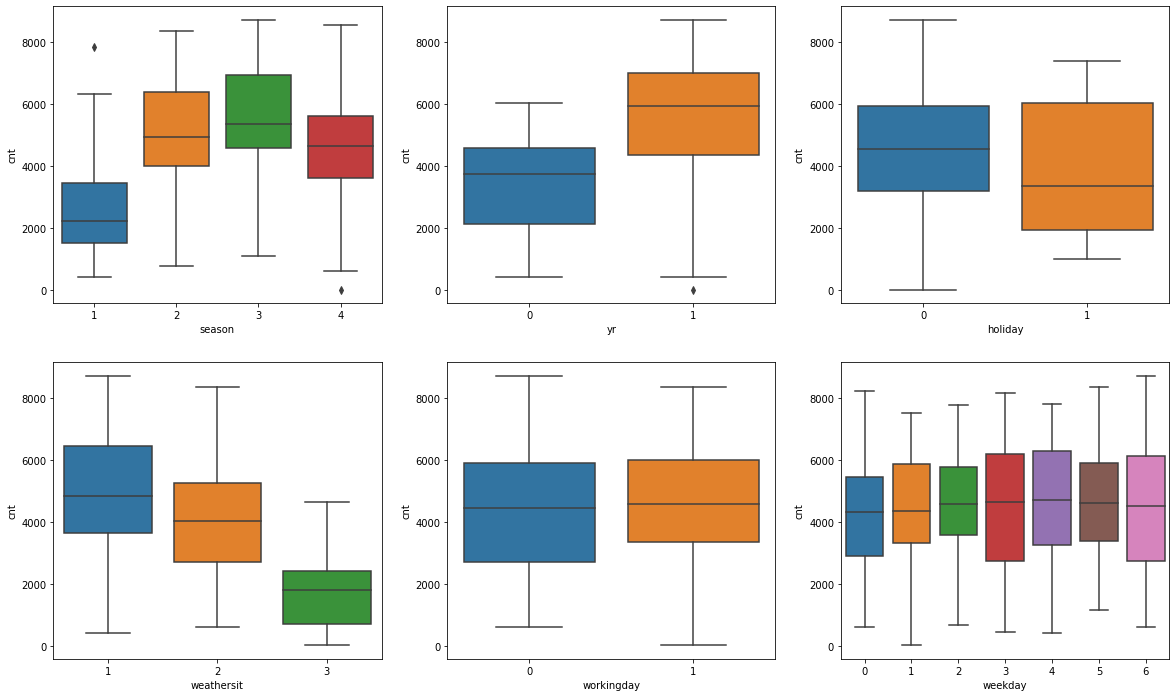

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1) #(row,column,position)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

In [20]:
#We can observe few things from above box-plots.
#1) Season --> In Season_3, we have more number of bike rented among all. 
#2) Year --> In yr-2019 - demand is high for shared bike as compared to 2018.
#3) Holiday --> Upper-quartile range is same for holiday and non-holiday count of target variable.
#4) weathersit --> weathersit_1 has higher number of people who rented bike.
#5) workingday --> median and upper-quartile range are same in both workingday yes/no.
#6) weekday --> Bike has high demand on weekday_3 followed by weekday_6. Median is same for all the day.

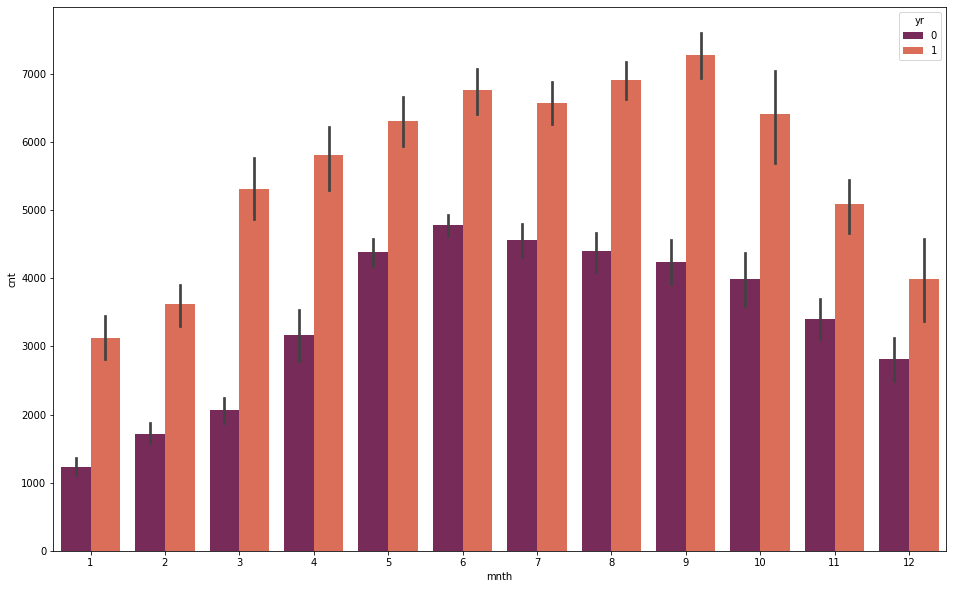

In [21]:
# let's plot the bar graph to compare how many bike rented  in each month in 2018 and 2019.
plt.figure(figsize=(16,10))
sns.barplot(x='mnth', y='cnt', hue='yr', data=bike, palette='rocket')
plt.show()

In [22]:
# Noticed that , in every months more no. of bike rented in 2019 compared to 2018. And highest is mnth_9 among all.

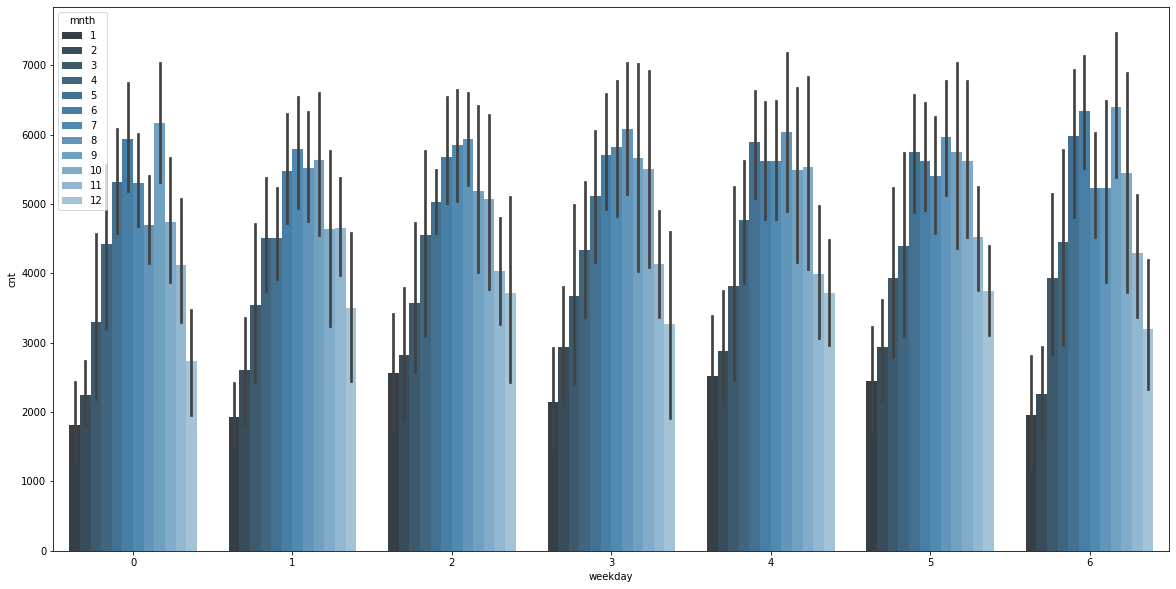

In [23]:
# Now Lets plot bar graph to check daywise count in every month. 
plt.figure(figsize=(20,10))
sns.barplot(x='weekday', y='cnt', hue='mnth', data=bike , palette='Blues_d')
plt.show()

####  DUMMY VARIABLE

In [24]:
# In the dataset we have 4 categorical variables namely - season , mnth, weekday and weathersit. Let's check the datatype of
# these 4 columns and convert them in 'categorical' datatype if any. And then create a Dummy Variable for them.

In [25]:
# Check the datatype of categorical variables
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [26]:
# Convert categorical variables into object datatype as they are in int now.
bike['season']=bike['season'].astype('object')
bike['mnth']=bike['mnth'].astype('object')
bike['weekday']=bike['weekday'].astype('object')
bike['weathersit']=bike['weathersit'].astype('object')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [27]:
# Use get_dummies method of pandas to convert categorical variables into dummy/indicator variables. Use drop_first=True, 
# to get (n-1) dummies out of n categorical levels by removing the first level.
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

In [28]:
# Check the shape after dummifying the dataset. Now we have 30 variables present. 
bike.shape

(730, 30)

####  Splitting the Data into Training and Testing Sets

In [29]:
# This is first step of multiple linear regression is to perform a train-test split. Using Scikit learn model selection library
# we can split the data using 'train_test_split'. 
from sklearn.model_selection import train_test_split

# we have to specify random.seed() so that the train and test data set always have the same rows respectively.
np.random.seed(0)

#specify train_size = 0.70 and test_size=0.30
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [30]:
# size of train dataset
df_train.shape

(510, 30)

In [31]:
# size of test dataset
df_test.shape

(219, 30)

#### Rescalling the Features

In [32]:
# For ease of interpreataion we are scalling on all the columns except dummy variables. We are using MinMaxScaler method of 
# Scikitlearn preprocessing library. Due to scalling we won't leak any information.
from sklearn.preprocessing import MinMaxScaler

In [33]:
# instantiate an object
scaler = MinMaxScaler()

In [34]:
# before scalling image of df_train model
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [35]:
# Apply scalar() to all the columns except the dummy_variables.
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Fit scaler computes mean and std deviation to be used for later scalling, nothing is given to you. And transform uses 
# previously computed mean and std deviation to autoscale the data. And fit_transform does both at the same time. Basically,
# fit_transform do a calculation and fitting data on the training set, then the same calculation can be directly used in 
# test set by using transform.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# Fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data
# and then replacing the missing values). So for training set, you need to both calculate and do transformation.
# But for testing set, Machine learning applies prediction based on what was learned during the training set and so it
# doesn't need to calculate, it just performs the transformation.

In [37]:
# after scalling image of df_train model
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [38]:
#By applying MinMaxScalar method, we can see that Max(=1) and Min(=0) lies b/w 0 and 1 for numerical columns.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####  Correlation coefficients

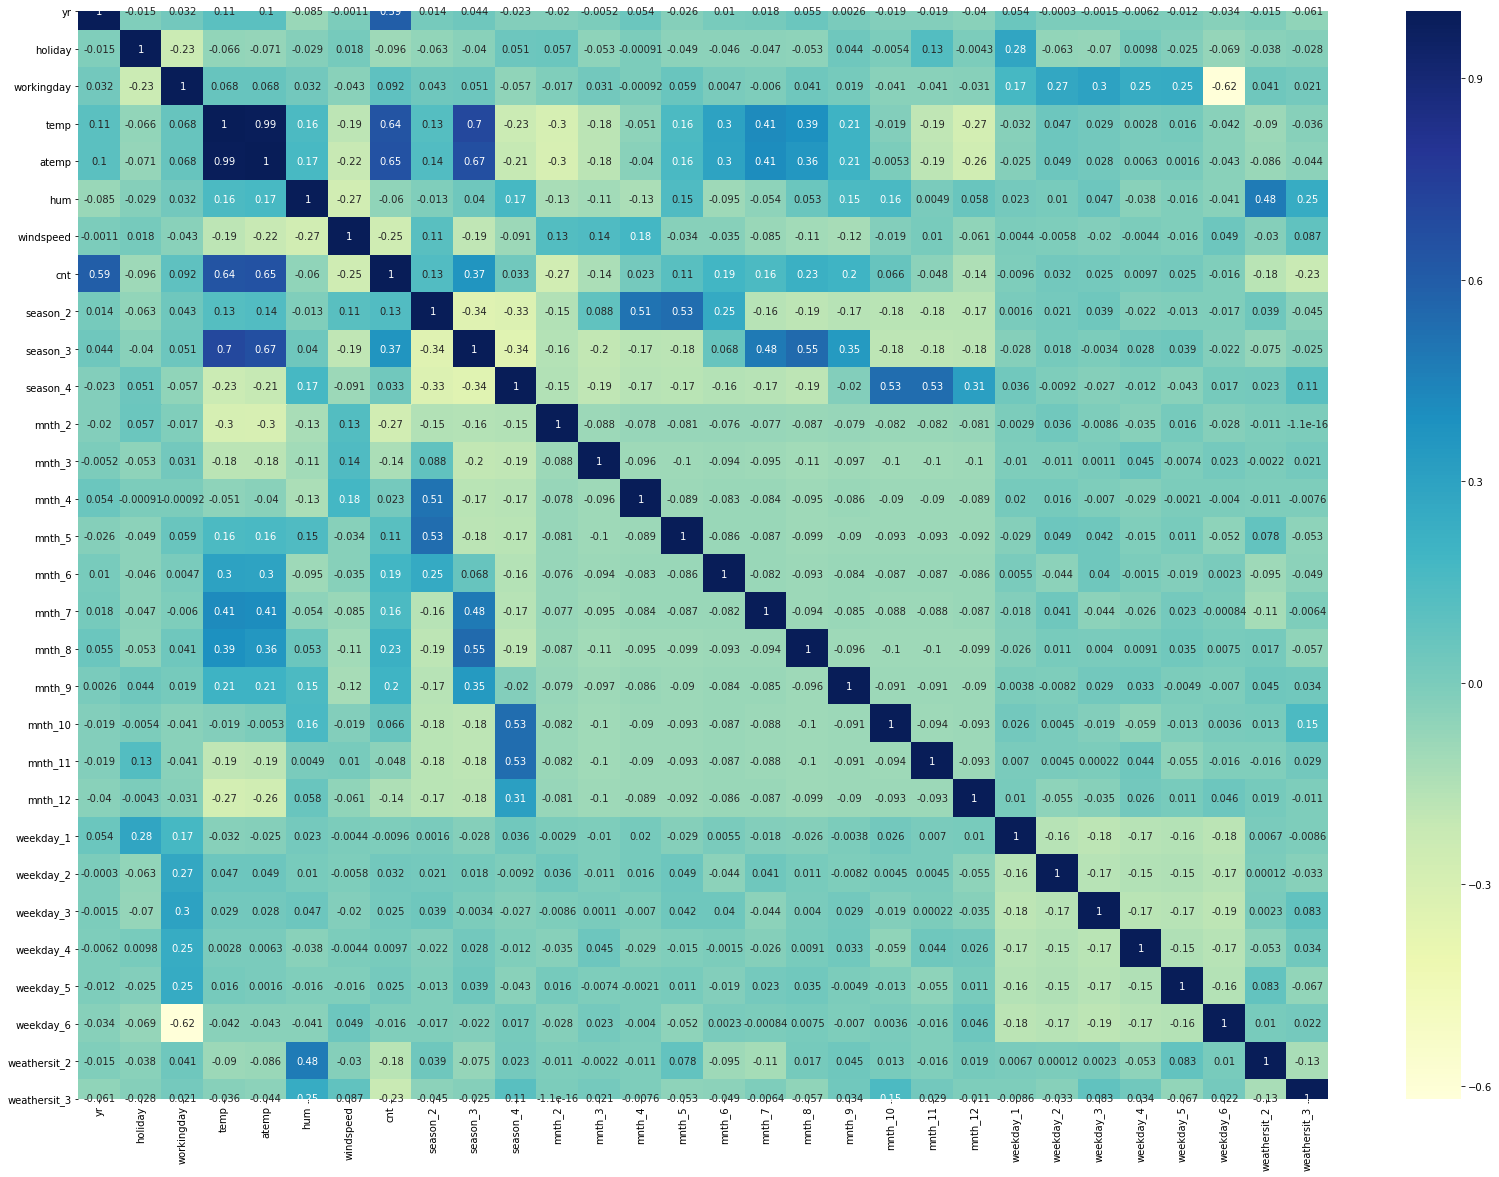

In [39]:
# Now we can check correlation coefficients to see which variables are highly correlated with target variable in the model.
plt.figure(figsize=(28,20))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

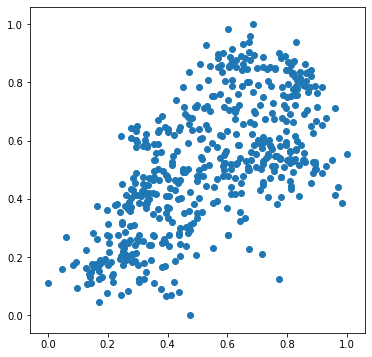

In [40]:
# From the above correlation matrix , we can noticed that target variable 'cnt' is highly correlated with 'temp' and 'atemp'.
# There is multicollinearity between 'temp' and 'atemp'. Will check if both variables are present in RFE or not.
# Let's see pairplot for cnt vs temp. 
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Step 3 . Data Modelling and Evaluation

####  Dividing X and y sets for the Model Building

In [41]:
#we are not adding target variable 'cnt' column in y_train by using pop method.
y_train = df_train.pop('cnt') 
X_train = df_train

In [42]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [43]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0


###  Building a Linear Model

####  Using RFE (Recursive Feature Elimination) approach

In [44]:
# Fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly fit
# a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing 
# through the origin, by default.

In [45]:
# To import RFE and LinearRegression libraries from scikit learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE , it requires 2 variables 1-fit model itself and 2- no of variables which top n variables
rfe = RFE(lm, 15)       
rfe = rfe.fit(X_train, y_train)

In [47]:
# zip() function taking iterable object and returning RFE_support in True/False and assigning RFE_ranking in True=1/False=2-15.
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [48]:
# Returns list of varibales which support RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [49]:
# Returns list of varibales which doesn't support RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [50]:
# As we know , 'temp' and 'atemp' are multicollinear in nature and by performing RFE, 'atemp' has excluded. So we don't have 
# multicollinear variable present in model now. But we will check other variables in VIF.

####  Building a model statsmodel, for the detailed statistics

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# importing statsmodel library and Adding a constant variable 
import statsmodels.api as sm  
# Using add_constant() method statsmodel fits an intercept.
X_train_lm1 = sm.add_constant(X_train_rfe)
# Running the linear model with OLS method of statsmodel which use to fit the line.
lm1 = sm.OLS(y_train,X_train_lm1).fit()   

In [53]:
#Check the parameters value
lm1.params

const           0.195004
yr              0.230066
holiday        -0.054625
workingday      0.044634
temp            0.495994
hum            -0.162256
windspeed      -0.182417
season_2        0.117478
season_3        0.029493
season_4        0.143048
mnth_8          0.047452
mnth_9          0.117784
mnth_10         0.044229
weekday_6       0.053306
weathersit_2   -0.059181
weathersit_3   -0.252340
dtype: float64

In [54]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.89e-191
Time:                        14:43:35   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [55]:
# We have very good R-sqaured value and Adjusted R-sqaured value from RFE approach in model (lm). 
# Will check high p-value VIF and drop variable if p-value>0.05 and VIF>5 , if any.

In [56]:
# Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated
# with each other. It is an extremely important parameter to test our linear model. 

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.44
8,season_4,2.88
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.90


####  Dropping the columns

In [58]:
# Always use high p-value and VIF value approach to drop the columns.
# season_3 has high p-value and VIF value also, let's drop that.

In [59]:
X_train_new = X_train_rfe.drop('season_3', axis=1)

In [60]:
# Rebuild the model without season_3
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   
#Let's see the parameters value of linear model
lm2.params

const           0.194540
yr              0.229153
holiday        -0.055848
workingday      0.044355
temp            0.530066
hum            -0.169212
windspeed      -0.185710
season_2        0.103928
season_4        0.134817
mnth_8          0.055981
mnth_9          0.125452
mnth_10         0.041091
weekday_6       0.052921
weathersit_2   -0.058227
weathersit_3   -0.248596
dtype: float64

In [61]:
# Summary of Linear Model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.24e-192
Time:                        14:43:35   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


In [63]:
# holiday has high p-value , lets drop first
X_train_new = X_train_new.drop('holiday', axis=1)

In [64]:
# Rebuild the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   

lm3.params

const           0.184780
yr              0.229323
workingday      0.052663
temp            0.531651
hum            -0.168252
windspeed      -0.186547
season_2        0.104649
season_4        0.134082
mnth_8          0.056352
mnth_9          0.123706
mnth_10         0.042337
weekday_6       0.061344
weathersit_2   -0.057941
weathersit_3   -0.247816
dtype: float64

In [65]:
# Summary of Linear Model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.86e-192
Time:                        14:43:35   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1848      0.028      6.496   

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
6,season_4,2.27
11,weathersit_2,2.13
0,yr,2.03
5,season_2,1.82
10,weekday_6,1.79
9,mnth_10,1.61


In [67]:
# By dropping variable , R-Square and Adjusted R-Sqaure are significant and much impact on them.

In [68]:
# mnth_10 has high p-value , lets drop that
X_train_new = X_train_rfe.drop('mnth_10', 1,)

In [69]:
# Rebuild the model without mnth_10
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()   

lm3.params

const           0.184780
yr              0.229323
workingday      0.052663
temp            0.531651
hum            -0.168252
windspeed      -0.186547
season_2        0.104649
season_4        0.134082
mnth_8          0.056352
mnth_9          0.123706
mnth_10         0.042337
weekday_6       0.061344
weathersit_2   -0.057941
weathersit_3   -0.247816
dtype: float64

In [70]:
# Summary of Linear Model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.42e-191
Time:                        14:43:35   Log-Likelihood:                 516.72
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1876      0.029      6.530   

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.06
4,hum,17.39
7,season_3,8.04
2,workingday,5.01
5,windspeed,3.88
6,season_2,3.37
8,season_4,2.51
12,weathersit_2,2.14
0,yr,2.04
11,weekday_6,1.90


In [72]:
# season_3 has high p-value and high VIF.  lets drop that. Still the R-square and adjusted R-square are significant.

In [73]:
X_train_new = X_train_new.drop('season_3', axis=1)
#Rebuild the model without season_3
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   

lm4.params

const           0.187657
yr              0.228914
holiday        -0.058111
workingday      0.043346
temp            0.539399
hum            -0.164739
windspeed      -0.182245
season_2        0.101995
season_4        0.148613
mnth_8          0.052332
mnth_9          0.119376
weekday_6       0.052003
weathersit_2   -0.057896
weathersit_3   -0.243111
dtype: float64

In [74]:
# Summary of Linear Model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.81e-192
Time:                        14:43:35   Log-Likelihood:                 516.20
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.029      6.532   

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,9.76
2,workingday,5.01
5,windspeed,3.82
11,weathersit_2,2.13
0,yr,2.02
10,weekday_6,1.90
6,season_2,1.82
7,season_4,1.75
8,mnth_8,1.59


In [76]:
# holiday has high p-value but good VIF.  However, lets drop that.

In [77]:
X_train_new = X_train_new.drop('holiday', axis=1)
# Rebuild the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()   

lm5.params

const           0.177272
yr              0.229083
workingday      0.051970
temp            0.541345
hum            -0.163598
windspeed      -0.183008
season_2        0.102685
season_4        0.148283
mnth_8          0.052604
mnth_9          0.117366
weekday_6       0.060749
weathersit_2   -0.057587
weathersit_3   -0.242126
dtype: float64

In [78]:
# Summary of linear Model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.47e-192
Time:                        14:43:35   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.05
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
10,weathersit_2,2.12
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.79
6,season_4,1.75
7,mnth_8,1.59


In [80]:
# mnth_8 has p-value which is ok and good VIF.  Still we need to drop as to make count 10 for independent variable.

In [81]:
X_train_new = X_train_new.drop('mnth_8', axis=1)
# Rebuild the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm6).fit()   

lm6.params

const           0.169821
yr              0.229437
workingday      0.053557
temp            0.570880
hum            -0.161282
windspeed      -0.186078
season_2        0.089914
season_4        0.140652
mnth_9          0.102541
weekday_6       0.063047
weathersit_2   -0.055314
weathersit_3   -0.243890
dtype: float64

In [82]:
# summary of LM
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        14:43:36   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1698      0.029      5.937   

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,weathersit_2,2.10
0,yr,2.02
8,weekday_6,1.79
6,season_4,1.66
5,season_2,1.58
7,mnth_9,1.20


In [84]:
# Now for all variables we have low p-value and very good VIF value (less than 5) except variable 'hum'. Lets drop that as well.

In [85]:
# hum has high VIF.  lets drop that
X_train_new = X_train_new.drop('hum', axis=1)
# Rebuild the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_lm7).fit()  

lm7.params

const           0.075325
yr              0.233056
workingday      0.056323
temp            0.549936
windspeed      -0.155238
season_2        0.087429
season_4        0.131826
mnth_9          0.097236
weekday_6       0.067688
weathersit_2   -0.081347
weathersit_3   -0.288021
dtype: float64

In [86]:
# Summary of LM
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        14:43:36   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


####  Updates on final model.
-  1) This (lm7) is the main linear model with good R-suqared value, less p-value and VIF value of all independent variables is       less than 5.  
-  2) F-statistics value is pretty good and prob(F-statistic) value is less than that so we can conclude that model is               significant. (Higher the F-statistics, more significant the model is.)
-  3) R-sqaure and adjusted R-sqaure values are 0.836 and 0.832 respectively, So that the model is able to explain 83.6% of the       variance which is pretty good.

#### Residual Analysis of the train data

In [88]:
y_train_pred = lm7.predict(X_train_lm7)

In [89]:
# Importing libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

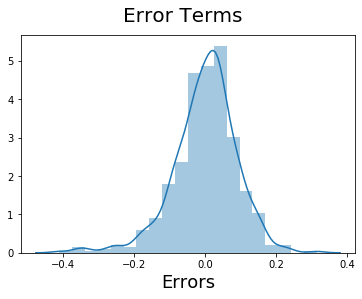

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [91]:
# The residuals are following the normally distributed with a mean 0. That's good sign. 
# Homoscedasticity - Errors terms have constant variance.

####  Making Predictions

In [92]:
####  Applying the scaling on the test sets

num_vars = ['temp','atemp','hum','windspeed','cnt']

# Fit_transform already done on train dataset then the same calculation directy used in test dataset using transform.
# As transform uses a previously computed mean and std deviation to autoscale the data. 
df_test[num_vars] = scaler.transform(df_test[num_vars]) 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####  Dividing into X_test and y_test

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4       219 non-null uint8
weekday_5  

In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
const           219 non-null float64
yr              219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_4        219 non-null uint8
mnth_9          219 non-null uint8
weekday_6       219 non-null uint8
weathersit_2    219 non-null uint8
weathersit_3    219 non-null uint8
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [96]:
####  Making predictions
y_pred = lm7.predict(X_test_lm7)

####  Model Evaluation

Text(0, 0.5, 'y_pred')

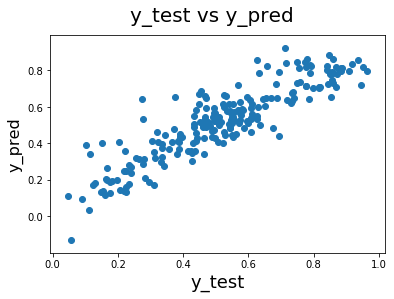

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ cnt = 0.075 + 0.233  \times  yr + 0.056  \times  workingday + 0.545 \times temp - 0.155 \times windspeed + 0.087 \times season_2 + 0.132 \times season_4 + 0.097 \times math_9 + 0.068 \times weekday_6 - 0.081 \times weathersit_2 - 0.288 \times weathersit_3 $

####  R-squared value for TEST

In [98]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_pred)
print('r_square_value : ', r_squared)

r_square_value :  0.7955844377237248


In [99]:
r2=0.7955844377237248

In [100]:
X_test.shape

(219, 10)

In [101]:
n = X_test.shape[0]   # n = sample size i.e. no. of rows in the dataset X_test , here 219
p = X_test.shape[1]   # Number of predictor variables , here 10 predictor variables.

# Formula of Adjusted R-squared is 1-(1-r2)*(n-1)/(n-p-1) . Here we have R-sqaured value of test set is 0.795.

adjusted_r_square = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r_square

0.7857567664604423

-  Train R-square = 0.836, Adjusted R-square = 0.832.Test R-square = 0.795, Adjusted R-square = 0.786.

###  Conclusion
-  We have very good R-square and Adjusted R-square value from both train and test dataset. Model is significant as difference    between R-sqaure value of train and test is less than 5% (0.05).  
-  1) From the final model (lm7) we can conclude that Temp, year, season 4(winter) are top 3 features contributing                   significantly the demands for the shared bikes. 
-  2) There is linear relationship between independent and target variables.
-  3) No multicollinearity between independent variables as VIF values is less than 5 which is really good.
-  4) F-statistics value for final linear model(lm7) is prety good i.e. 254.0  as compared to first model(lm1) i.e. 184.7 .
-  5) Model is not overfit as we can see that accuracy of train and test set are fairly good.(difference between them is less         than 0.05).  

-  Developed by Pritamkumar Suryavanshi. IIITB/Upgrad Bike Sharing Assignment on Linear Regression.